# Welcome to the Chemical Clocks Module

### A chemical clock is a type of chemical reaction that literally runs like clockwork. With many of these reactions, you can determine the chemical composition just by timing the reaction!

- Here we will use Python to simulate the Belousov-Zhabotinsky (BZ) reaction, which can be classified as a chemical clock. There are many different BZ reactions using different chemicals, but they all follow the same behavior.

- This interesting reaction is "oscillatory". In the video you are about to see you will notice the color of the reaction mixture changing from red to green and then back again.

- The math we will be using was developed at the University of Oregon! If you're curious about it, open this link in a new tab: http://www.scholarpedia.org/article/Oregonator

# <font color='red'>*WARNING*</font>
# <font color='red'>The chemicals used in the reactions you're about to see are hazardous. Do not attempt to recreate these reactions without adult supervision and proper personal protective equipment (goggles, gloves, etc.)</font>

## Click the arrow on the left of the next cell TWICE to begin.
### (This is how you'll be running blocks of code. You can also hit Shift and Enter on your keyboard)

In [1]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/8xSqvlkL1hk", width=560, height=315)

## As you can see, the color change happens QUICKLY, but at consistent times. 
- This is why we can call the BZ reaction a Chemical Clock.

## Click the arrow on the next box to watch a video of a different BZ reaction.

- You'll notice it takes longer for the color to change.
- When they speed up this video to 400x you can't even see the color change!

In [2]:
IFrame("https://www.youtube.com/embed/07n2WGg4WTc", width=560, height=315)

## The next video shows how the first reaction is made.
## <font color='red'>__AGAIN, DO NOT TRY THIS AT HOME__</font>
## <font color='red'>You WILL get hurt if you touch these chemicals.</font>

In [3]:
IFrame("https://www.youtube.com/embed/kw9wF-GNjqs", width=560, height=315)

### This module will show you how you can write code to model interesting science like this! And the best part?

# You don't have to be "good" at math to do this!!!

### If someone has given you the equations you need, all you need to do is write them into the code and the computer does all the work for you!

## Here are the equations we'll be using:

# $r_x = (qy - xy +x(1 - x))/\epsilon$
# $r_y = (-qy -xy +z)/\epsilon'$
# $r_z = x - z$

### If you wanted to solve these yourself you would need to take an advanced college math class.
### Luckily, the computer can solve these for us!
- The way it does this is like making a movie.
- The computer takes a bunch of "pictures" really quickly and then plays them together to make it look like they're moving.

### You only need to understand a few important things:
- $r_x$, $r_y$, and $r_z$ together tell us how fast the reaction is happening (basically how fast the color is changing). We call these the "rates" of reaction.
- There are a bunch of chemicals floating around in that beaker, but the only chemicals that matter are chemical X, chemical Y and chemical Z.
- The $x$, $y$, and $z$ tell us how much of each chemical is in the mixture.
- $q$, $\epsilon$, and $\epsilon'$ are just numbers we get to choose.

## Let's get started! Click the arrows next to each block as you go through the module

#### First, we need to tell Python where to look for the code we'll need. This code is stored in a so-called "library".
#### To access the code in these libraries, we tell Python to "import" the code.
#### I wrote in some comments if you're curious about what the libraries are for. You can learn more about them by searching them on Google (or your favorite search engine).
# Click the arrow on the next block

In [4]:
#######################This stuff is for all the fun buttons you'll be clicking#######################

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

###################These tell python where to find the math stuff it needs and how to make plots######
get_ipython().run_line_magic('matplotlib', 'inline')
import math
import random
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np

## The next few blocks show the reactions we'll be thinking about, and how we record the parameters in the code.
#### The parameters are just numbers the computer will need to solve the equations.
#### The following table shows the steps in one kind of BZ reaction. The model we're using simplifies this.
#### The k's on the right side of this table are called "rate constants". These tell us how fast each step will happen.
## Don't worry too much about understanding this.



![Image of Reactions](http://www.scholarpedia.org/w/images/4/48/Table1.jpg)

# Click the arrow

In [5]:
def initialize(pH, x, y, z, timeStep, T):
    
    #These are the rate constants for the reaction.
    #F indicates the forward reaction
    #R indicates the reverse reaction
    
    kF1 = 8e9   #M^-2*s^-1
    kR1 = 110   #s^-1
    kF2 = 3e6   #M^-2*s^-1
    kR2 = 2e-5  #M^-1*s^-1
    kF3 = 2     #M^-3*s^-1
    kR3 = 3.2   #M^-1*s^-1
    kF4 = 3e3   #M^-1*s^-1
    kR4 = 1e-8  #M^-2*s^-1
    kF5 = 42    #M^-2*s^-1
    kR5 = 2.2e3 #s^-1
    kF5a = 7.4e4 #s^-1
    kR5a = 1.4e9 #M^-1*s^-1
    kF6 = 8e4   #M^-2*s^-1
    kR6 = 8.9e3 #M^-1*s^-1
    
    #This is pretty messy right? The Oregonator model makes things WAY more simple!
    #We're going to make things simple by introducing new rate constants!
    
    H = 10**(-pH)
    
    k1 = kF3*H**2    
    k2 = kF2*H
    k3 = kF5*H
    k4 = kF4*H
    
    kc = 1.00
    
    A = 0.06
    B= 0.02
    
    #Here are those numbers q, 𝜖, and 𝜖′ in the equations above:
    
    q = 2*k1*k4/(k2*k3)
    epsilon = kc*B/(k3*A)
    eprime = 2*kc*k4*B/(k2*k3*A)
    
    #Here are the scaling relationships for X, Y, and Z:
    #X0M = (k3*A/(2*k4))*x
    #Y0M = (k3*A/k2)*y
    #Z0M = ((k3*A)**2/(kc*k4*B))*z
    
    #Finally, here's where the model figures out how many scaled timesteps to run for:
    N = math.floor(T/timeStep) #Floor because computers start counting at 0
    
    params = {'q':q,
              'epsilon' : epsilon,
              'eprime' : eprime,
              'x0' : x,
              'y0' : y,
              'z0' : z,
              'T' : T,
              'N' : N}
    
    return params

def select(p):
    return p

## Run the next block of code.
## Those complicated equations from before don't seem so bad once we put them into our code, as you'll see in the next block.

#### The first function in the next block is what our equations look like in the code.
#### The second function tells the computer how to solve those equations.

In [6]:
#The rRate function (short for "reaction rate") computes the rates for the system as an array

def rRate(u, t, q, epsilon, eprime):
    
    x, y, z = u
    
    rx = (q*y - x*y + x*(1 - x))/epsilon
    ry = (-q*y - x*y + 1*z)/eprime #normally the last term would be f*z, but we are taking f to be 1 here.
    rz = x - z
    
    r = [rx, ry, rz]
    
    return r


#The "concs" (short for "concentrations") function solves the equations

def concs(prms):
    
    q = prms.get('q')
    eprime = prms.get('eprime')
    epsilon = prms.get('epsilon')
    T = prms.get('T')
    N = prms.get('N')
    
    #We will have u0 hold the initial concentrations
    u0 = [prms.get('x0'), prms.get('y0'), prms.get('z0')]
    
    
    #Time points to solve at:
    t = np.linspace(0, T, num = N)
    
    #This is the step that solves the equations
    sol = odeint(rRate, u0, t, args = (q, epsilon, eprime))
    
    return sol, t

# Now we get to have some fun! Like real scientists, you're going to change the parameters.

- The pH measures the acidity of the reaction solution. As you'll see, this needs to be VERY acidic (low pH). You don't want to touch this with your bare hands.
- x, y, and z are the amounts of the three chemicals that make the color change happen.

## We need to tell the computer how many pictures to take.
- This tells the computer how much time we want the reaction to run.
- You can think about this like filming a movie. The camera takes a bunch of pictures really fast, and when you flip through the pictures it looks like they're moving.
- Like filming a movie, this will only work if you take A LOT of pictures.

# Run the next block, then click and drag the sliders to choose how much of each chemical we start with.
- Set x and y to 1.00 (just drag the scroller all the way to the right).
- Set z to 0 (we'll assume there's none in there initially).

### Now, let's take those numbers we chose and have the computer tell us what will happen.

# <font color='red'>**MAKE SURE YOU ONLY RUN THIS NEXT BLOCK OF CODE ONCE. IT WILL RESET IF YOU CLICK THE BUTTON TO RUN IT AGAIN**</font>

In [7]:
#This is to help you choose the parameters
def f(x, y, z):
    return x, y, z

chosen_concs = interact(f, x = (0, 1.0, 0.1),  y = (0, 1.0, 0.1), z = (0, 1.0, 0.1))

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0), FloatSlider(value=0.5, description='y'…

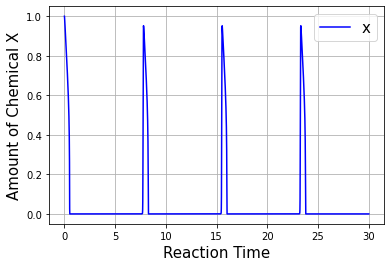

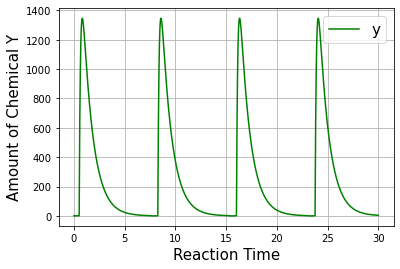

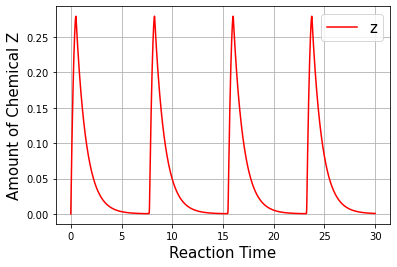

In [12]:
x0 = chosen_concs.widget.result[0]
y0 = chosen_concs.widget.result[1]
z0 = chosen_concs.widget.result[2]
chosen_params = initialize(0.10, x0, y0, z0, 0.001, 30)
solution, time = concs(chosen_params)

plt.plot(time, solution[:, 0], 'b', label='x')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical X', fontsize = 15)
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical Y', fontsize = 15)
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical Z', fontsize = 15)
plt.grid()
plt.show()

## These graphs show how the amounts of each chemical in the beaker change over time.
- If you could zoom in on the pictures, you would see that the lines are actually 30,000 dots placed close together!
- The Greek letter $τ$ is used for time because this time is "scaled" (it's not in seconds or minutes).
- Scaling just means we've multiplied it by something to make it easier for the computer to plot.

## Can you figure out which chemical (X, Y, or Z) is causing the color change?
- The answer is Z, which in this case is Iron. The Iron (Fe$^{2+}$) in the Ferroin he adds is red. When it reacts to form Fe$^{3+}$, it turns blue.
- Look at the bumps in the graphs. The bump happens in the blue graph (X), then red (Z), and then green (Y).
- So what's the story here? How is this happening?

## Run the next block to plot the red and blue graphs together:

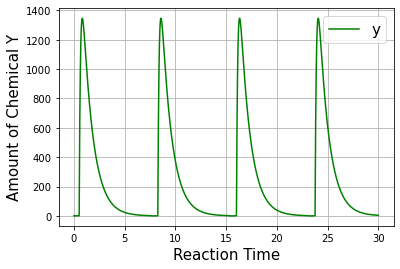

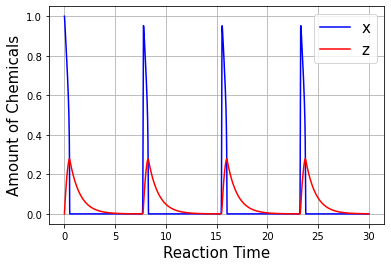

In [13]:
plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical Y', fontsize = 15)
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 0], 'b', label='x')
plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemicals', fontsize = 15)
plt.grid()
plt.show()

## Chemical X _helps_ chemical Z form, and then chemical Y destroys both of them. (ouch...)
- We call chemical X a _catalyst_ because it helps ("catalyzes") the reaction.
- Chemical Y is called an _inhibitor_ because it slows down ("inhibits") the reaction that makes the color change.

## Let's see what happens when we change other parameters!

## What happens when we change the pH?
- To answer this, we're going to keep the same amounts of X, Y, and Z as we had above.
- I set the pH from before to be 0.10 (this is very acidic, and would hurt if it got on your skin).
- Run the next block of code and set the pH to 1.00

In [168]:
def pH_choice(pH):
    return pH

chosen_pH = interact(pH_choice, pH = (-1, 1, 0.01))

interactive(children=(FloatSlider(value=0.0, description='pH', max=1.0, min=-1.0, step=0.01), Output()), _dom_…

## Run this next block of code

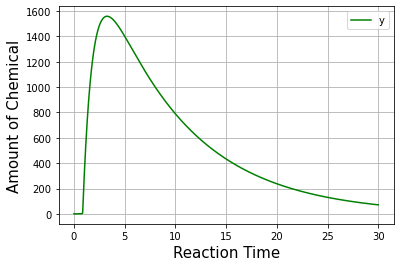

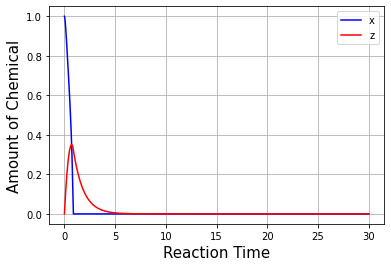

In [169]:
chosen_params = initialize((chosen_pH.widget.result), x0, y0, z0, 0.001, 30)
solution, time = concs(chosen_params)

plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical', fontsize = 15)
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 0], 'b', label='x')
plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical', fontsize = 15)
plt.grid()
plt.show()

## Notice that there's only one bump now? There were four when we first ran it.

## This means that the color change will happen slower!
- This tells us that making the solution more acidic will make the reaction happen faster.
- Go back and set the pH to -0.33 (drag the slider to the right).
- This pH is so acidic it will burn through most gloves.

## Now let's see what happens when we let the reaction happen longer.
- There are two things to do here. We need to decide how long to run the reaction, and how many pictures to take.

## When you run the next block of code:
- Set timeStep = 0.0001 (click the dropdown menu and select the one at the top).
- Set TotalTime = 100 (I set it to 30 before).

## Run the next block of code. It might take a while to make the graphs this time

In [15]:
def getTime(timeStep, TotalTime):
    return timeStep, TotalTime

chosen_times = interact(getTime, timeStep = [0.0001, 0.001, 0.01], TotalTime = (10, 100, 1))

interactive(children=(Dropdown(description='timeStep', options=(0.0001, 0.001, 0.01), value=0.0001), IntSlider…

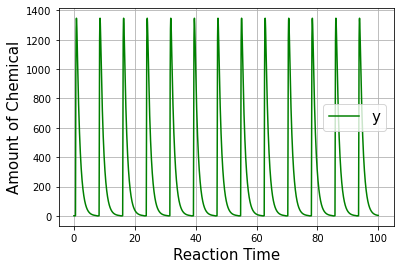

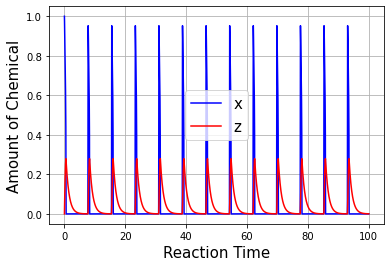

In [16]:
tstep = getTime.widget.result[0]
T = getTime.widget.result[1]
chosen_params = initialize(0.10, 1.00, 1.00, 0, tstep, T)
solution, time = concs(chosen_params)

plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical', fontsize = 15)
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 0], 'b', label='x')
plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical', fontsize = 15)
plt.grid()
plt.show()

## That took longer to run, right? That's because we told it to take more pictures!
- The longer you tell the computer to run the code, the longer it will take to solve the equations we gave it.
- A lot of scientific calculations need to run for MUCH longer than this. The longer you need to run these calculations, the more powerful you need your computer to be (a lot of scientists use supercomputers for this).

# Here are all the parameters we talked about. Feel free to mess around with the parameters and see what interesting stuff you can get the graphs to do!

In [170]:
final_params = interact(initialize,
                          pH = (-1,1,0.01),
                          x = (0,1,0.1),
                          y = (0,1,0.1),
                          z = (0,1,0.1),
                          kc = (0.1, 2.0, 0.1),
                          timeStep = [0.0001, 0.001, 0.1],
                          T = (10, 50, 1))

interactive(children=(FloatSlider(value=0.0, description='pH', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

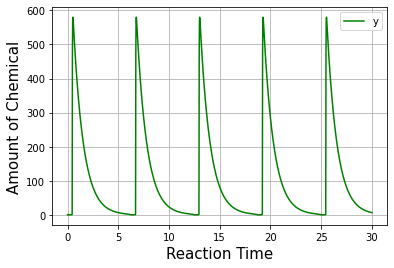

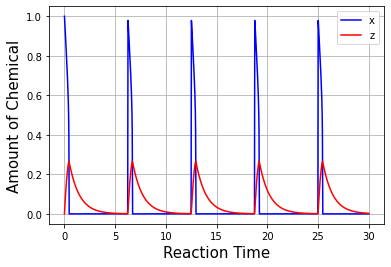

In [171]:
solution, time = concs(final_params.widget.result)

plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical', fontsize = 15)
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 0], 'b', label='x')
plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best', fontsize = 15)
plt.xlabel('Reaction Time', fontsize = 15)
plt.ylabel('Amount of Chemical', fontsize = 15)
plt.grid()
plt.show()

# That's all for now! Let us know if you'd be interested in learning about more types of chemical clocks. We might even be able to help you make one in a lab sometime!